# Part 6A

## Pre-Processing

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

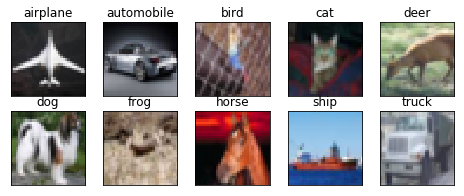

In [9]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Running As-is model

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_203 (Conv2D)          (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_202 (Activation)  (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_203 (Activation)  (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_180 (Dropout)        (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 23s 58ms/step - loss: 1.8595 - acc: 0.2775 - val_loss: 1.4269 - val_acc: 0.4705
Epoch 2/100
390/390 [==============================] - 21s 53ms/step - loss: 1.3455 - acc: 0.5128 - val_loss: 1.1288 - val_acc: 0.5963
Epoch 3/100
390/390 [==============================] - 20s 51ms/step - loss: 1.1233 - acc: 0.5996 - val_loss: 1.0133 - val_acc: 0.6400
Epoch 4/100
390/390 [==============================] - 21s 54ms/step - loss: 0.9879 - acc: 0.6569 - val_loss: 0.8801 - val_acc: 0.6945
Epoch 5/100
390/390 [==============================] - 21s 53ms/step - loss: 0.8847 - acc: 0.6938 - val_loss: 0.7636 - val_acc: 0.7370
Epoch 6/100
390/390 [==============================] - 21s 54ms/step - loss: 0.8147 - acc: 0.7211 - val_loss: 0.7044 - val_acc: 0.7572
Epoch 7/100
390/390 [==============================] - 21s 55ms/step - loss: 0.7571 - acc: 0.7417 - val_loss: 0.6962 - val_acc: 0.7600
Epoch 8/100
390/390 [==============================] - 

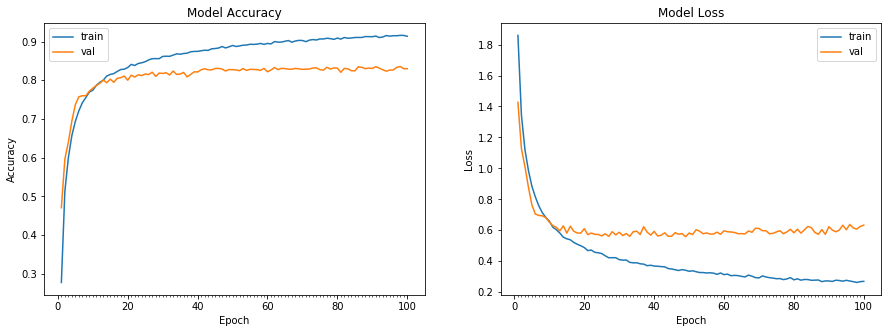

Accuracy on test data is: 82.98


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Updating the model and reruning

**Updated the architecture so as to reach receptive field size of 32, same as of input image. Moreover, added 1x1 to reduce the size of channels during transition between two blocks**

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), border_mode='same'))    #32, 3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(64, 3, 3, border_mode='same')) #32, 5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(128, 3, 3, border_mode='same')) #32, 7
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(256, 3, 3, border_mode='same')) #32, 9
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(256, 3, 3, border_mode='same')) #32, 11
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(256, 3, 3, border_mode='same')) #32, 12
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(256, 3, 3, border_mode='same')) #32, 13
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2))) #16, 26


model.add(Convolution2D(64, 1, 1, border_mode='same')) #16, 26
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(128, 3, 3, border_mode='same')) #16, 28
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(256, 3, 3, border_mode='same')) # 16, 30
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(256, 3, 3, border_mode='same')) # 16, 32
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(10, 1, 1, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(10, 16))

model.add(Flatten())

model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_209 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_210 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_185 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_210 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_211 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_44 (Batc (None, 32, 32, 64)        256       
__________

**Please Note: Why I stopped the below training: Due to a lot of project deliveries this week, did not get time to work on the assignment before. Only 3 hours left till deadline. In the training I already achieved 88.06 validation accuracy, hence to save time and complete the assignment I am stopping the training and proceeding with 6B part.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 165s 423ms/step - loss: 1.5924 - acc: 0.4357 - val_loss: 1.3518 - val_acc: 0.5301
Epoch 2/100
390/390 [==============================] - 156s 400ms/step - loss: 1.1344 - acc: 0.5980 - val_loss: 1.0811 - val_acc: 0.6177
Epoch 3/100
390/390 [==============================] - 155s 396ms/step - loss: 0.9220 - acc: 0.6773 - val_loss: 0.9643 - val_acc: 0.6637
Epoch 4/100
390/390 [==============================] - 155s 396ms/step - loss: 0.8003 - acc: 0.7175 - val_loss: 0.8068 - val_acc: 0.7219
Epoch 5/100
390/390 [==============================] - 155s 396ms/step - loss: 0.7179 - acc: 0.7478 - val_loss: 0.7923 - val_acc: 0.7238
Epoch 6/100
390/390 [==============================] - 155s 396ms/step - loss: 0.6574 - acc: 0.7704 - val_loss: 0.7496 - val_acc: 0.7426
Epoch 7/100
390/390 [==============================] - 155s 396ms/step - loss: 0.6041 - acc: 0.7890 - val_loss: 0.6970 - val_acc: 0.7672
Epoch 8/100
390/390 [====================

KeyboardInterrupt: ignored

**Please Note: Why I stopped the training: Due to a lot of project deliveries this week, did not get time to work on the assignment before. Only 3 hours left till deadline. In the training I already achieved 88.06 validation accuracy, hence to save time and complete the assignment I am stopping the training and proceeding with 6B part.**

# Part 6B

## Rewriting the model with various types of Convolutions

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Model, Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Concatenate, Input
from keras.layers.merge import concatenate
from keras.layers.advanced_activations import LeakyReLU, ReLU


In my architecture, same as in part 6A, there are seven layers in the first block. In thos layers have implemented various types of convolutions as follows:
* Layer1_part1: Normal convolution (with dilation 1 -- that is default)
* Layer1_part2: Nomal convolution (with dilation 2)
* Layer1_part3: Group convolution between Layer1_part1 and Layer1_part2
* Layer1_part4: 1x1 to reduce channels to 32 from the previous concatanated output
* Layer2_part1: 3x1 convolution for separable convolution
* Layer2_part2: 1x3 convolution for separable convolution
* Layer2_part3: Concetanation between Layer2_part4 and Layer2_part2 (for group convolution between 3x3 and 5x5)
* Layer2_part4: 1x1 to reduce the number of channels to 64
* Layer3: Depthwise convolution: Using keras SeparableConv2D that does 3x3 conv for each channel and stacks the outputs from all the channels, followed by 1x1 to mix and combine the channels


In [14]:
input = Input(shape=(32, 32, 3,))

# In this block -> Doing group convolution between (3x3 with dilation 1 and 3x3 with dilation 2)
x = Conv2D(32, (3,3), strides=(1,1), border_mode='same', name='conv_1_d1', dilation_rate=(1, 1), use_bias=False)(input) #Layer1_part1
x = BatchNormalization(name='norm_1')(x)
x = ReLU()(x)
x1 = Dropout(0.25)(x)
x = Conv2D(32, (3,3), strides=(1,1), border_mode='same', name='conv_1_d2', dilation_rate=(2, 2), use_bias=False)(input) #Layer1_part2
x = BatchNormalization(name='norm_2')(x)
x = ReLU()(x)
x2 = Dropout(0.25)(x)
x = concatenate([x1, x2]) #Layer1_part3
x = Conv2D(32, (1,1), strides=(1,1), border_mode='same', name='conv_2_c1', use_bias=False)(x) #Layer1_part4
x = BatchNormalization(name='norm_3')(x)
x = ReLU()(x)

# In this block -> Doing group convolution between (3x3 and 5x5) and separation convolution (on layer corresponding to 5x5 RF)
skip_connection = x #Copy of output from Layer1
x = Conv2D(64, (3,1), strides=(1,1), border_mode='same', name='conv_2_s1', use_bias=False)(x)  #Layer2_part1
x = BatchNormalization(name='norm_4')(x)
x = ReLU()(x)
x = Conv2D(64, (1,3), strides=(1,1), border_mode='same', name='conv_2_s2', use_bias=False)(x) #Layer2_part2
x = BatchNormalization(name='norm_5')(x)
x = ReLU()(x)
x = Dropout(0.25)(x) #Output from Layer2
x = concatenate([skip_connection, x])  #Layer2_part3
x = Conv2D(64, (1,1), strides=(1,1), border_mode='same', name='conv_2_c2', use_bias=False)(x)  #Layer2_part4
x = BatchNormalization(name='norm_6')(x)
x = ReLU()(x)

# In this block -> Doing depthwise convolution
x = SeparableConv2D(64, (3,3), strides=(1,1), border_mode='same', name='conv_3', use_bias=False)(x) #Layer3
x = BatchNormalization(name='norm_7')(x)
x = ReLU()(x)
x = Dropout(0.25)(x)


x = Conv2D(256, (3,3), strides=(1,1), border_mode='same', name='conv_5', use_bias=False)(x)
x = BatchNormalization(name='norm_9')(x)
x = ReLU()(x)
x = Dropout(0.25)(x)


x = Conv2D(256, (3,3), strides=(1,1), border_mode='same', name='conv_6', use_bias=False)(x)
x = BatchNormalization(name='norm_10')(x)
x = ReLU()(x)
x = Dropout(0.25)(x)

x = Conv2D(256, (3,3), strides=(1,1), border_mode='same', name='conv_7', use_bias=False)(x)
x = BatchNormalization(name='norm_11')(x)
x = ReLU()(x)
x = Dropout(0.25)(x)

x = Conv2D(256, (3,3), strides=(1,1), border_mode='same', name='conv_8', use_bias=False)(x)
x = BatchNormalization(name='norm_12')(x)
x = ReLU()(x)
x = Dropout(0.25)(x)

x = MaxPooling2D(pool_size=(2, 2))(x)


x = Conv2D(64, (1,1), strides=(1,1), border_mode='same', name='conv_9', use_bias=False)(x)
x = BatchNormalization(name='norm_13')(x)
x = ReLU()(x)
x = Conv2D(128, (3,3), strides=(1,1), border_mode='same', name='conv_10', use_bias=False)(x)
x = BatchNormalization(name='norm_14')(x)
x = ReLU()(x)
x = Dropout(0.25)(x)
x = Conv2D(256, (3,3), strides=(1,1), border_mode='same', name='conv_11', use_bias=False)(x)
x = BatchNormalization(name='norm_15')(x)
x = ReLU()(x)
x = Dropout(0.25)(x)
x = Conv2D(256, (3,3), strides=(1,1), border_mode='same', name='conv_12', use_bias=False)(x)
x = BatchNormalization(name='norm_16')(x)
x = ReLU()(x)
x = Dropout(0.25)(x)


x = Conv2D(10, (1,1), strides=(1,1), border_mode='same', name='conv_13', use_bias=False)(x)
x = BatchNormalization(name='norm_17')(x)
x = ReLU()(x)
x = Conv2D(10, (16,16), name='conv_14', use_bias=False)(x)

x = Flatten()(x)

output = Activation('softmax')(x)

model = Model(inputs=[input], outputs=[output])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), strides=(1, 1), name="conv_1_d1", dilation_rate=(1, 1), use_bias=False, padding="same")`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), strides=(1, 1), name="conv_1_d2", dilation_rate=(2, 2), use_bias=False, padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), strides=(1, 1), name="conv_2_c1", use_bias=False, padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 1), strides=(1, 1), name="conv_2_s1", use_bias=False, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 3), strides=(1, 1), name="conv_2_s2", use_bias=False, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Ker

In [15]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv_1_d1 (Conv2D)              (None, 32, 32, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
conv_1_d2 (Conv2D)              (None, 32, 32, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
norm_1 (BatchNormalization)     (None, 32, 32, 32)   128         conv_1_d1[0][0]                  
__________________________________________________________________________________________________
norm_2 (Ba

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 154s 395ms/step - loss: 1.5437 - acc: 0.4348 - val_loss: 1.9903 - val_acc: 0.4294
Epoch 2/50
390/390 [==============================] - 149s 382ms/step - loss: 1.1329 - acc: 0.5943 - val_loss: 1.4279 - val_acc: 0.5333
Epoch 3/50
390/390 [==============================] - 147s 377ms/step - loss: 0.9391 - acc: 0.6681 - val_loss: 1.4293 - val_acc: 0.5402
Epoch 4/50
390/390 [==============================] - 147s 376ms/step - loss: 0.8241 - acc: 0.7083 - val_loss: 1.0790 - val_acc: 0.6332
Epoch 5/50
390/390 [==============================] - 147s 377ms/step - loss: 0.7471 - acc: 0.7390 - val_loss: 1.0539 - val_acc: 0.6390
Epoch 6/50
390/390 [==============================] - 147s 376ms/step - loss: 0.6854 - acc: 0.7601 - val_loss: 0.8422 - val_acc: 0.7076
Epoch 7/50
390/390 [==============================] - 147s 377ms/step - loss: 0.6340 - acc: 0.7793 - val_loss: 1.0198 - val_acc: 0.6631
Epoch 8/50
390/390 [============================

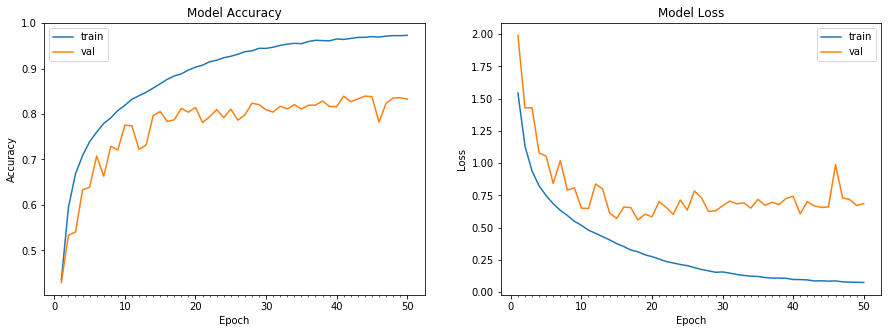

Accuracy on test data is: 83.27


In [16]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Well, the highest validation accuracy achieved is 83.94 at epoch number 41. This is the result of seprable, depthwise and group convolutions combined.